#**Introduction**

This assignment explores the interesting relationship between algebra and geometry using computational methods. The emphasis is on studying algorithms and approaches for solving problems in polynomial algebra, geometric constructs, and their applications. This approach uses computational methods to increase knowledge of abstract mathematical concepts and their real-world applications. Through this assignment, I hope to improve my ability to apply computational approaches to algebraic and geometric problems, so contributing to my overall mathematical knowledge.

#**Load and display the park dataset**

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import math

In [ ]:
data = pd.read_csv("/content/sample_data/Rasheda_Begum_Computational_Geometry_for_Park_Design.csv")
data

,ID,Zone_Name,Point_A_X,Point_A_Y,Point_B_X,Point_B_Y,Shape_Type,Cost_Per_Meter
0,1,Playground,0,0,5,5,Rectangle,10
1,2,Picnic Area,6,6,12,12,Rectangle,12
2,3,Walking Path,5,5,6,6,Linear,8
3,4,Entrance,0,0,6,6,Line,15
4,5,Park Boundary,0,0,12,12,Polygon,20
5,6,Playground,0,0,4,0,Rectangle,10
6,7,Picnic Area,6,6,10,10,Rectangle,12
7,8,Walking Path,3,3,5,5,Linear,8
8,9,Park Boundary,0,0,10,10,Polygon,20
9,10,Park Boundary,5,5,7,7,Polygon,15


#**Display the first few rows of the dataset and its column names**

In [ ]:
data.head()
data.columns

Index(['ID', 'Zone_Name', 'Point_A_X', 'Point_A_Y', 'Point_B_X', 'Point_B_Y',
       'Shape_Type', 'Cost_Per_Meter'],
      dtype='object')

#**Define the dataset columns**

#Extract relevant columns related to coordinates and shapes

In [ ]:
coordinates = pd.DataFrame(data, columns=['Zone_Name', 'Point_A_X', 'Point_A_Y', 'Point_B_X', 'Point_B_Y', 'Shape_Type'])
coordinates

,Zone_Name,Point_A_X,Point_A_Y,Point_B_X,Point_B_Y,Shape_Type
0,Playground,0,0,5,5,Rectangle
1,Picnic Area,6,6,12,12,Rectangle
2,Walking Path,5,5,6,6,Linear
3,Entrance,0,0,6,6,Line
4,Park Boundary,0,0,12,12,Polygon
5,Playground,0,0,4,0,Rectangle
6,Picnic Area,6,6,10,10,Rectangle
7,Walking Path,3,3,5,5,Linear
8,Park Boundary,0,0,10,10,Polygon
9,Park Boundary,5,5,7,7,Polygon


#**Ensure data consistency by dropping rows with missing values**

In [ ]:
data.dropna()

,ID,Zone_Name,Point_A_X,Point_A_Y,Point_B_X,Point_B_Y,Shape_Type,Cost_Per_Meter
0,1,Playground,0,0,5,5,Rectangle,10
1,2,Picnic Area,6,6,12,12,Rectangle,12
2,3,Walking Path,5,5,6,6,Linear,8
3,4,Entrance,0,0,6,6,Line,15
4,5,Park Boundary,0,0,12,12,Polygon,20
5,6,Playground,0,0,4,0,Rectangle,10
6,7,Picnic Area,6,6,10,10,Rectangle,12
7,8,Walking Path,3,3,5,5,Linear,8
8,9,Park Boundary,0,0,10,10,Polygon,20
9,10,Park Boundary,5,5,7,7,Polygon,15


#**Convert the data into a DataFrame for easier manipulation**
Function to calculate area for different shapes

Filter the data for rectangles and display the areas for each rectangle


In [ ]:
df = pd.DataFrame(data)

def calculate_and_display_areas(shape, x1, y1, x2, y2):
    if shape == "Rectangle":
        length = abs(x2 - x1)
        width = abs(y2 - y1)
        return length * width
    elif shape == "triangular":
        print("Triangular shape found.")
    else:
        return None

df["Area"] = df.apply(lambda row: calculate_and_display_areas(row["Shape_Type"], row["Point_A_X"], row["Point_A_Y"], row["Point_B_X"], row["Point_B_Y"]), axis=1)

df_rectangle = df[df["Shape_Type"] == "Rectangle"]
print(df_rectangle[["ID", "Zone_Name", "Area"]])

    ID    Zone_Name  Area
0    1   Playground  25.0
1    2  Picnic Area  36.0
5    6   Playground   0.0
6    7  Picnic Area  16.0
10  11  Picnic Area   4.0
11  12   Playground   0.0
15  16   Playground   0.0
16  17  Picnic Area   0.0
20  21   Playground   0.0
21  22  Picnic Area   0.0
24  25   Playground   0.0
25  26  Picnic Area   0.0
28  29   Playground   0.0
29  30  Picnic Area   0.0
33  34  Picnic Area   0.0
34  35   Playground   0.0
38  39   Playground   0.0
39  40  Picnic Area   0.0
43  44  Picnic Area   0.0
44  45   Playground   0.0
47  48  Picnic Area   0.0
48  49   Playground   1.0


#**Visualize the zones using matplotlib**
Define colors for different zone types

Plot each zone based on its shape type

Add labels, legend, and title to the plot


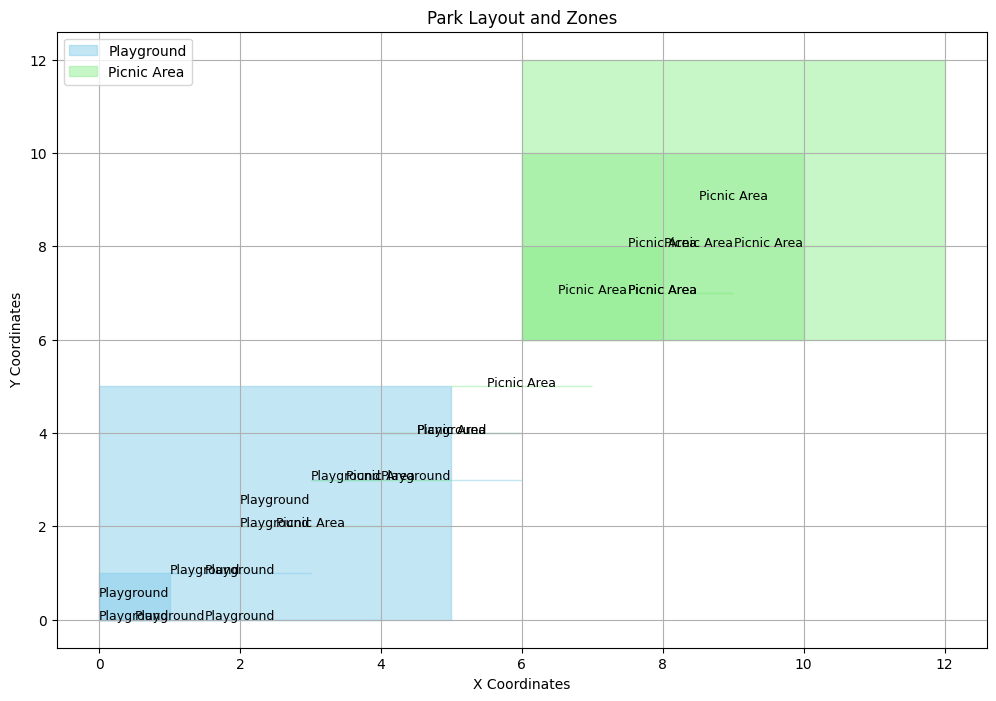

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

zone_colors = {
    "Playground": "skyblue",
    "Picnic Area": "lightgreen",
    "Walking Path": "grey",
    "Entrance": "orange",
    "Park Boundary": "brown",
}

for _, row in df.iterrows():
    if row["Shape_Type"] == "Rectangle":
        # Plot rectangles
        plt.fill(
            [row["Point_A_X"], row["Point_B_X"], row["Point_B_X"], row["Point_A_X"]],
            [row["Point_A_Y"], row["Point_A_Y"], row["Point_B_Y"], row["Point_B_Y"]],
            color=zone_colors.get(row["Zone_Name"], "white"),
            alpha=0.5,
            label=row["Zone_Name"] if row["Zone_Name"] not in plt.gca().get_legend_handles_labels()[1] else "",
        )
        # Add labels
        center_x = (row["Point_A_X"] + row["Point_B_X"]) / 2
        center_y = (row["Point_A_Y"] + row["Point_B_Y"]) / 2
        plt.text(center_x, center_y, row["Zone_Name"], fontsize=9, ha="center")

plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.title("Park Layout and Zones")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


In [ ]:
fencing_cost_per_meter = 15  # Adjust this value as needed

def calculate_perimeter(shape, x1, y1, x2, y2):
    if shape == "Rectangle":
        length = abs(x2 - x1)
        width = abs(y2 - y1)
        return 2 * (length + width)
    else:
        return 0


df["Perimeter"] = df.apply(
    lambda row: calculate_perimeter(row["Shape_Type"], row["Point_A_X"], row["Point_A_Y"], row["Point_B_X"], row["Point_B_Y"]),
    axis=1
)

total_fencing = df["Perimeter"].sum()

total_fencing_cost = total_fencing * fencing_cost_per_meter

print(f"Total Fencing Required: {total_fencing:.2f} meters")
print(f"Total Fencing Cost: ${total_fencing_cost:.2f}")


Total Fencing Required: 138.00 meters
Total Fencing Cost: $2070.00


In [ ]:
m = 10
b = 50

def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


def calculate_path_cost(x1, y1, x2, y2):
    d = calculate_distance(x1, y1, x2, y2)
    return m * d + b


df["Path_Cost"] = df.apply(
    lambda row: calculate_path_cost(row["Point_A_X"], row["Point_A_Y"], row["Point_B_X"], row["Point_B_Y"]),
    axis=1
)

walking_paths_df = df[df["Shape_Type"] == "Linear"]


total_walking_path_cost = walking_paths_df["Path_Cost"].sum()


print(f"Total Walking Path Construction Cost: ${total_walking_path_cost:.2f}")


walking_paths_df.to_csv("walking_path_costs.csv", index=False)
print("Walking path costs saved to 'walking_path_costs.csv'.")


Total Walking Path Construction Cost: $751.42
Walking path costs saved to 'walking_path_costs.csv'.
